In [1]:
%matplotlib inline


# Regularization path of L1- Logistic Regression
# L1-逻辑回归的正则化路径


Train l1-penalized logistic regression models on a binary classification problem derived from the Iris dataset.

The models are ordered from strongest regularized to least regularized. The 4 coefficients of the models are collected and plotted as a "regularization path": on the left-hand side of the figure (strong regularizers), all the coefficients are exactly 0. When regularization gets progressively looser, coefficients can get non-zero values one after the other.

Here we choose the SAGA solver because it can efficiently optimize for the Logistic Regression loss with a non-smooth, sparsity inducing l1 penalty.

Also note that we set a low value for the tolerance to make sure that the model as converged before collecting the coefficients.

We also use warm_start=True which means that the coefficients of the models are reused to initialize the next model fit to speed-up the computation of the full-path.

采用IRIS鸢尾花数据集，利用L1惩罚的Logistic回归模型进行训练，该问题为二分类问题。

得到的训练模型按照由强到弱正则化排序，通过模型的4个特征值对应的系数绘制“正则化路径”图：在图的左侧（强正则化器），所有特征系数都是0。但当正则化逐渐变松时（即C值变大时），特征系数得到非零值。

在这里，本例选择SAGA求解方法，是因为它可以有效地优化Logistic回归损失，并且可以使得L1惩罚函数具有非平滑、稀疏性。

还要注意，本例为公差设置了一个较低的值，以确保在得到模型系数之前模型收敛。

使用warm_start=true，为了使模型的参数能够被重用，并初始化下一个模型，以加快整个路径的计算速度。


In [2]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

Automatically created module for IPython interactive environment


In [3]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

# Normalize X to speed-up convergence
# 为了加速收敛，对特征集X进行归一化
X /= X.max()

In [4]:
# #############################################################################
# Demo path functions
# 计算一个C的下限值，然后放大到一个区间内
# logspac用于创建等比数列：从0到1e+07，元素个数为16个
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)
cs

array([1.00071480e-01, 2.93073795e-01, 8.58308976e-01, 2.51368192e+00,
       7.36168089e+00, 2.15597467e+01, 6.31408350e+01, 1.84917063e+02,
       5.41556353e+02, 1.58602607e+03, 4.64490662e+03, 1.36032805e+04,
       3.98391736e+04, 1.16674779e+05, 3.41698958e+05, 1.00071480e+06])

Computing regularization path ...
This took 5.671s


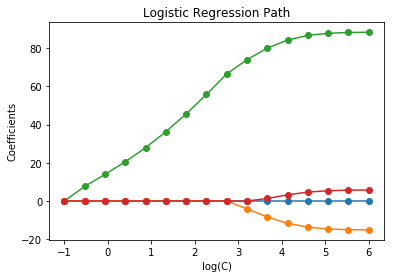

In [5]:
print("Computing regularization path ...")
start = time()
# 创建Logistic模型
clf = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    # 将模型得到的特征系数转变为一维向量并进行存储
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
# 绘制折线图展示
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()